In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [4]:
data.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [12]:
data.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,customerID_0013-SMEOE,...,TotalCharges_995.35,TotalCharges_996.45,TotalCharges_996.85,TotalCharges_996.95,TotalCharges_997.65,TotalCharges_997.75,TotalCharges_998.1,TotalCharges_999.45,TotalCharges_999.8,TotalCharges_999.9
0,0,1,29.85,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,34,56.95,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,2,53.85,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,45,42.30,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,2,70.70,1,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [4]:
data = pd.get_dummies(data, drop_first=True)

In [ ]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')

In [7]:
from sklearn.model_selection import train_test_split
X = data.drop('Churn_Yes', axis=1)
y = data['Churn_Yes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

GradientBoostingClassifier()

In [9]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'learning_rate': [0.1, 0.01]}
grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.01],
                         'n_estimators': [100, 200]})

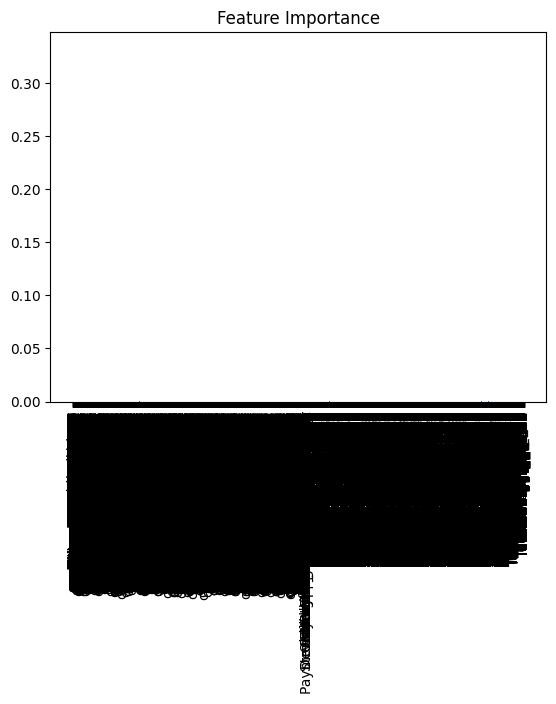

In [10]:

feature_importance = model.feature_importances_
plt.bar(X.columns, feature_importance)
plt.title('Feature Importance')
plt.xticks(rotation=90)
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


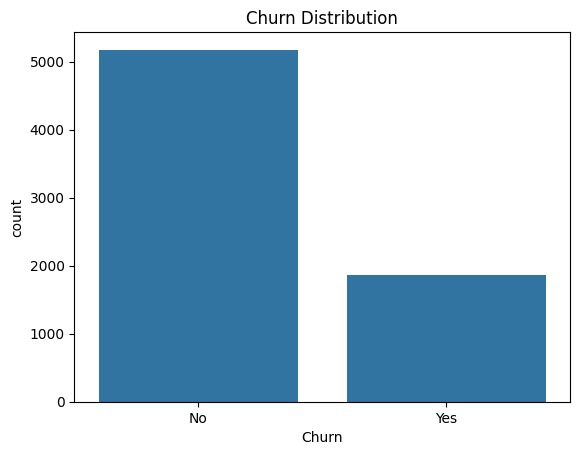

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

print(data.info())
print(data['Churn'].value_counts())

sns.countplot(x='Churn', data=data)
plt.title("Churn Distribution")
plt.show()


In [13]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your data
data = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')  # Replace with your path

# Step 1: Convert 'TotalCharges' to numeric BEFORE anything else
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Step 2: Drop rows with NaN values (after converting 'TotalCharges')
data.dropna(inplace=True)

# Step 3: Label encode the target column
le = LabelEncoder()
data['Churn'] = le.fit_transform(data['Churn'])  # Yes=1, No=0

# Step 4: Separate numerical and categorical columns
numerical = ['tenure', 'MonthlyCharges', 'TotalCharges']
categorical_cols = data.select_dtypes(include=['object']).drop(columns=['customerID']).columns

# Step 5: One-hot encode categorical columns
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Step 6: Scale numerical features
scaler = StandardScaler()
data[numerical] = scaler.fit_transform(data[numerical])


In [16]:
# Drop 'customerID' since it's just an identifier and not useful for modeling
data.drop('customerID', axis=1, inplace=True)

# Then split your features and labels
X = data.drop('Churn', axis=1)
y = data['Churn']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7846481876332623
[[926 107]
 [196 178]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.62      0.48      0.54       374

    accuracy                           0.78      1407
   macro avg       0.72      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



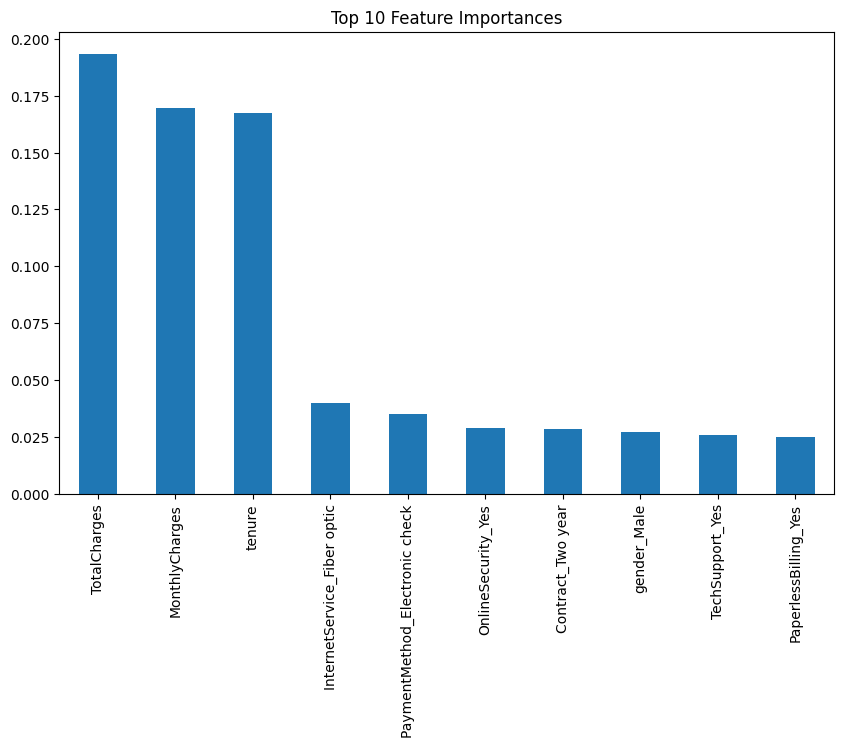

In [18]:
importances = model.feature_importances_
features = X.columns
feat_imp = pd.Series(importances, index=features).sort_values(ascending=False)

plt.figure(figsize=(10,6))
feat_imp[:10].plot(kind='bar')
plt.title("Top 10 Feature Importances")
plt.show()


In [19]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop customerID (irrelevant)
data.drop("customerID", axis=1, inplace=True)

# Convert 'TotalCharges' to numeric
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')

# Drop rows with missing values (e.g., TotalCharges)
data.dropna(inplace=True)

# Encode target variable
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
categorical = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=categorical, drop_first=True)


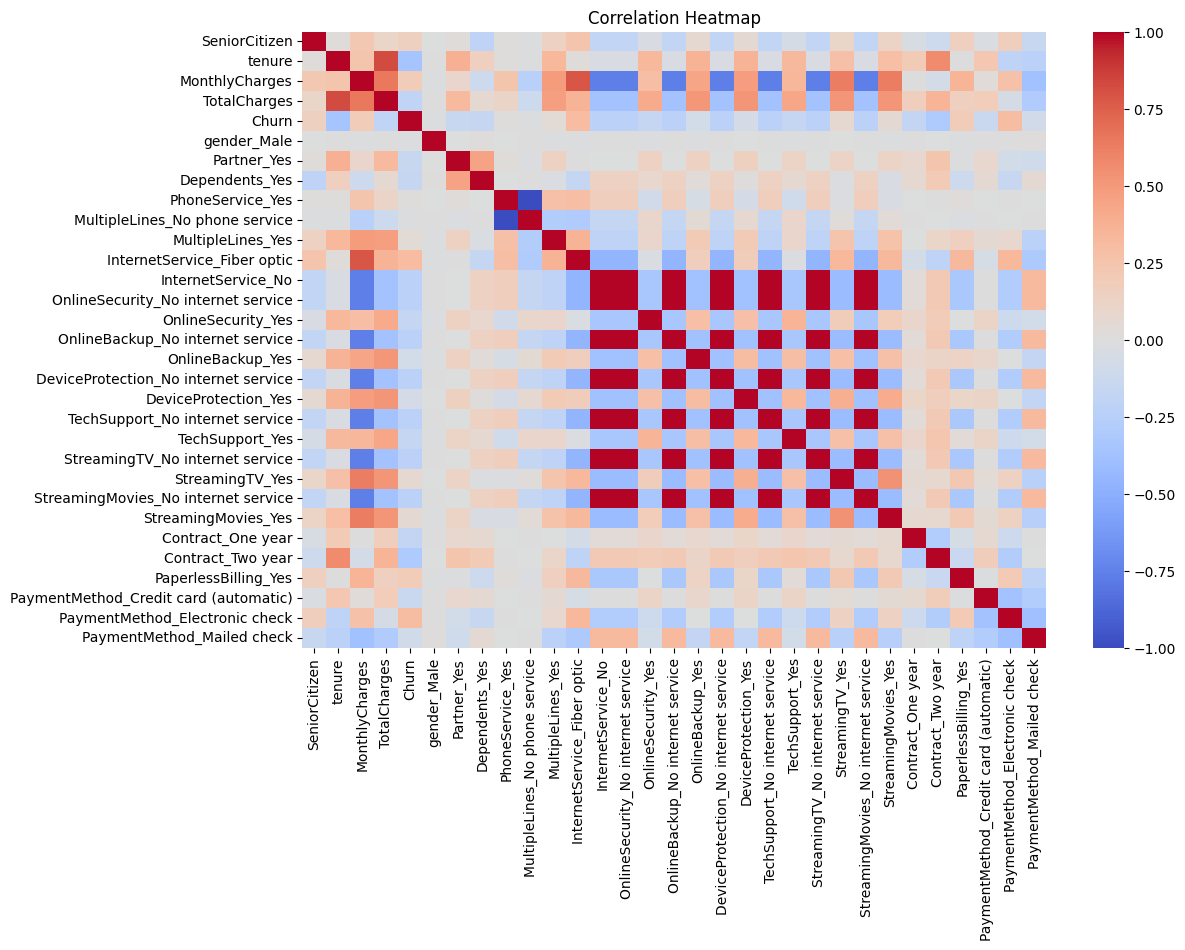

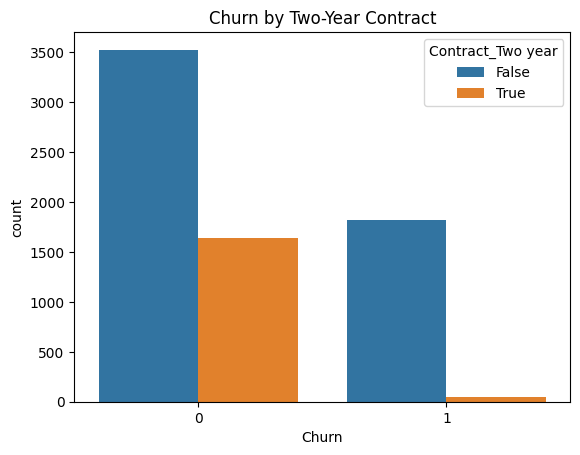

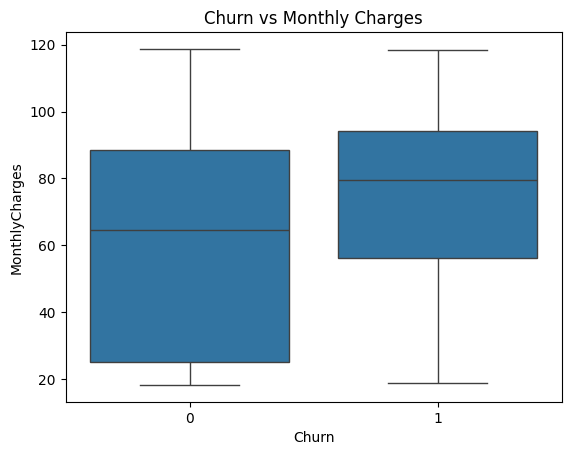

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()

# Churn by contract type
sns.countplot(x='Churn', hue='Contract_Two year', data=data)
plt.title("Churn by Two-Year Contract")
plt.show()

# Churn by Monthly Charges
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Churn vs Monthly Charges")
plt.show()


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score

X = data.drop("Churn", axis=1)
y = data["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)

y_pred = gb_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7896233120113717
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



In [22]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}

grid_search = GridSearchCV(
    GradientBoostingClassifier(random_state=42),
    param_grid,
    cv=5,
    scoring='accuracy',
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

print("Best Parameters:", grid_search.best_params_)

y_pred_best = best_model.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_best))


Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 100}
Tuned Accuracy: 0.7981520966595593


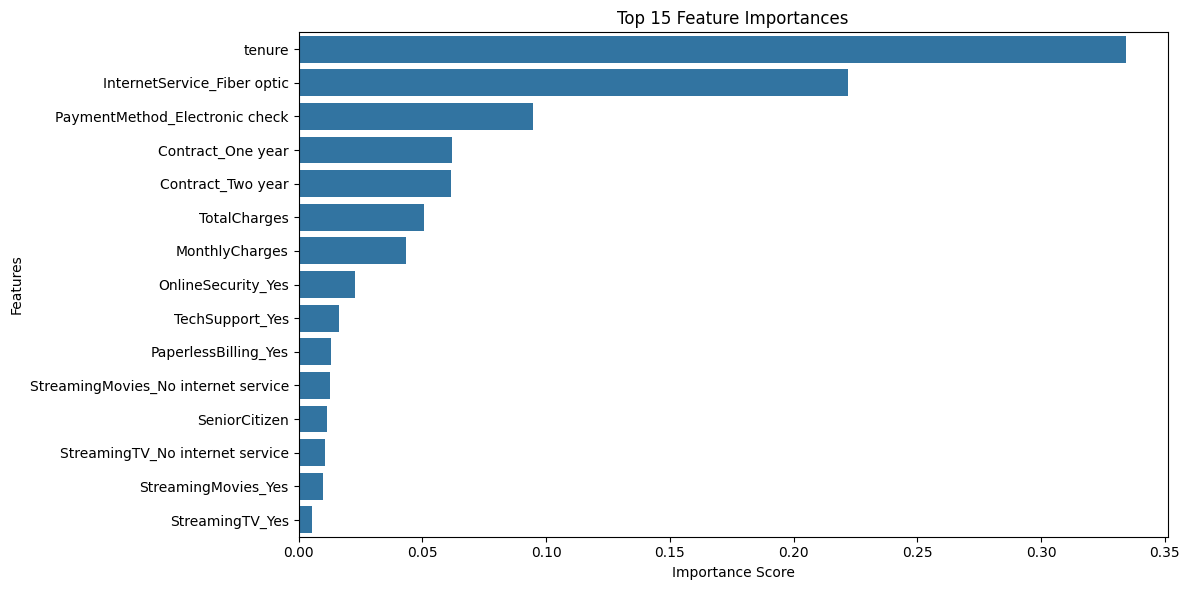

In [23]:
importances = best_model.feature_importances_
features = X.columns
indices = np.argsort(importances)[::-1]

# Plot top 15 features
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.tight_layout()
plt.show()


In [24]:
import pandas as pd
import numpy as np

# Load dataset
data = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

# Drop irrelevant columns
data.drop('customerID', axis=1, inplace=True)

# Fix data types
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors='coerce')
data.dropna(inplace=True)

# Encode target
data['Churn'] = data['Churn'].map({'Yes': 1, 'No': 0})

# One-hot encode categorical features
cat_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=cat_cols, drop_first=True)


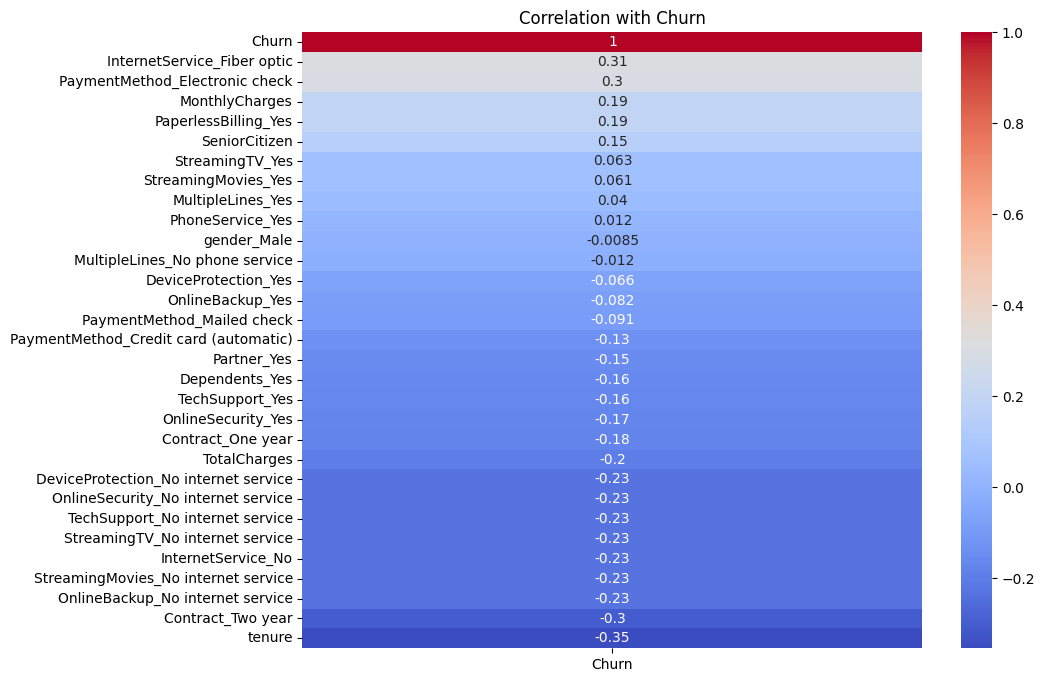

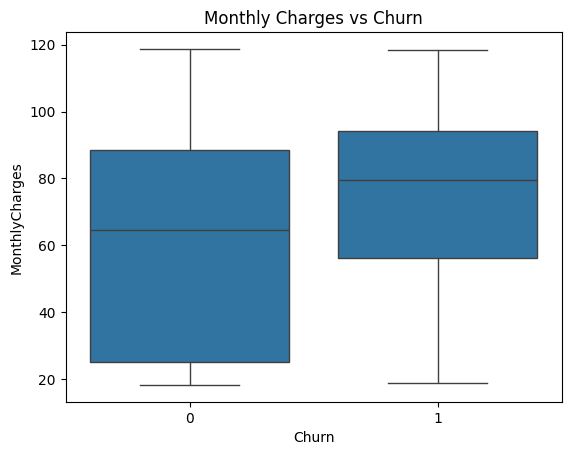

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr()[['Churn']].sort_values(by='Churn', ascending=False), annot=True, cmap='coolwarm')
plt.title("Correlation with Churn")
plt.show()

# Boxplot: MonthlyCharges vs Churn
sns.boxplot(x='Churn', y='MonthlyCharges', data=data)
plt.title("Monthly Charges vs Churn")
plt.show()


In [27]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

X = data.drop('Churn', axis=1)
y = data['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

xgb = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb.fit(X_train, y_train)

y_pred = xgb.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7739872068230277
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1033
           1       0.59      0.50      0.54       374

    accuracy                           0.77      1407
   macro avg       0.71      0.69      0.69      1407
weighted avg       0.76      0.77      0.77      1407



c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:10:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


In [28]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.05, 0.1],
    'n_estimators': [100, 200]
}

grid = GridSearchCV(XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                    param_grid, cv=5, scoring='accuracy', verbose=1)
grid.fit(X_train, y_train)

print("Best Params:", grid.best_params_)

best_xgb = grid.best_estimator_
y_pred_tuned = best_xgb.predict(X_test)
print("Tuned Accuracy:", accuracy_score(y_test, y_pred_tuned))


Fitting 5 folds for each of 12 candidates, totalling 60 fits


c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:11:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\training.py:183: UserWarning: [18:

Best Params: {'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 200}
Tuned Accuracy: 0.798862828713575


c:\Users\Ankan Dutta\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


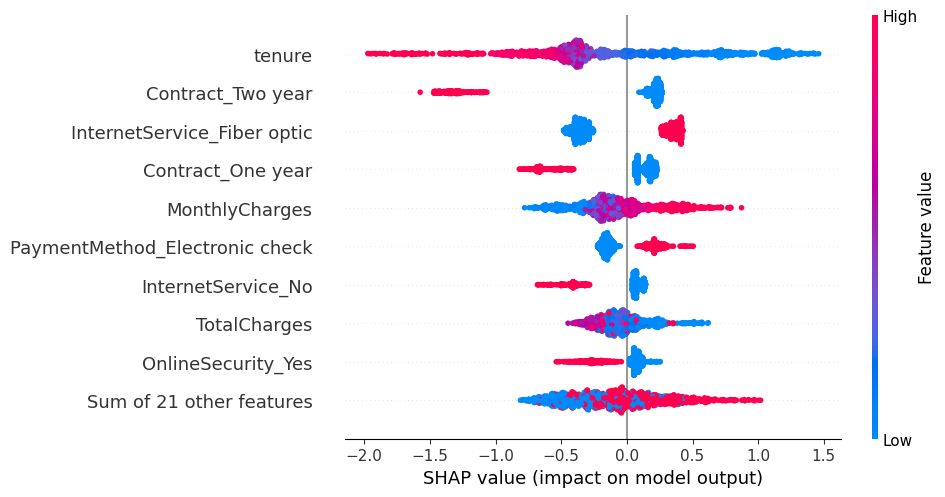

In [31]:
import shap

# SHAP values
explainer = shap.Explainer(best_xgb)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.plots.beeswarm(shap_values)


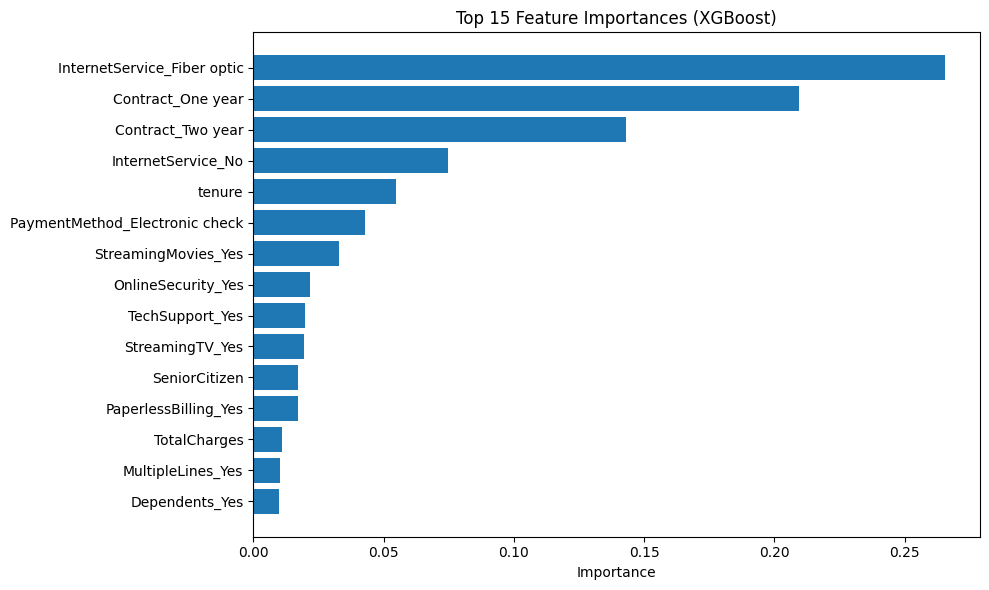

In [32]:
import matplotlib.pyplot as plt

# Plot top 15 features
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(10, 6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.title('Top 15 Feature Importances (XGBoost)')
plt.xlabel('Importance')
plt.tight_layout()
plt.show()


In [33]:
import joblib
joblib.dump(best_xgb, 'telco_churn_xgb_model.pkl')


['telco_churn_xgb_model.pkl']

In [34]:
import pandas as pd

df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")
print(df.head())
print(df.info())
print(df['Churn'].value_counts())


   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

In [35]:
# Remove customerID
df.drop("customerID", axis=1, inplace=True)

# Convert 'TotalCharges' to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True)

# Encode target
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})


In [36]:
df = pd.get_dummies(df, drop_first=True)


In [37]:
from sklearn.model_selection import train_test_split

X = df.drop("Churn", axis=1)
y = df["Churn"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

model = GradientBoostingClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))


Accuracy: 0.7896233120113717
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1033
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



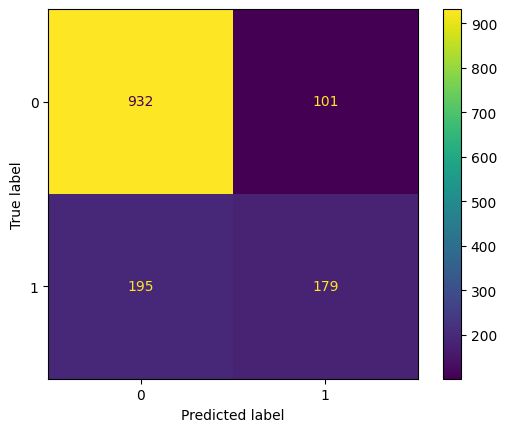

In [39]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model, X_test, y_test)


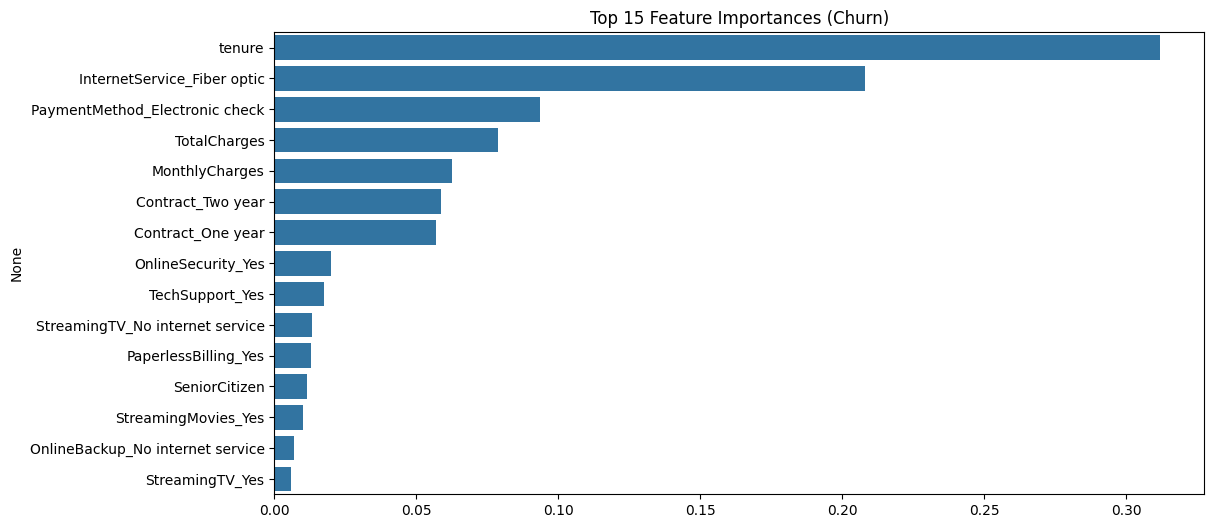

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

features = X.columns
importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

# Plot top 15
plt.figure(figsize=(12, 6))
sns.barplot(x=importances[indices][:15], y=features[indices][:15])
plt.title("Top 15 Feature Importances (Churn)")
plt.show()


In [42]:
# Sample new customer data (match the same column order as X)
new_customer = X.iloc[0:1]  # simulate with real data structure

prediction = model.predict(new_customer)
print("Will this customer churn?", "Yes" if prediction[0] == 1 else "No")


Will this customer churn? Yes
